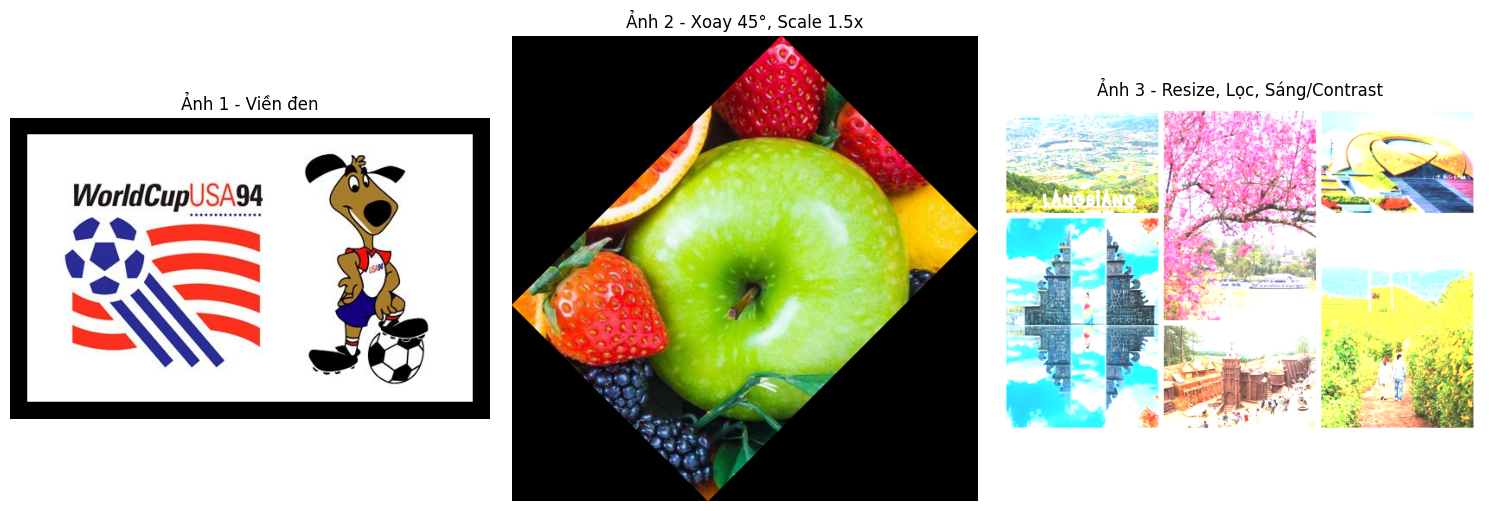

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img1 = cv2.imread('world_cup.jpg')
img2 = cv2.imread('orange.jpg')
img3 = cv2.imread('dalat.jpg')


if img1 is None or img2 is None or img3 is None:
    print(" Một hoặc nhiều ảnh không được tìm thấy. Kiểm tra tên ảnh.")
    exit()


def bgr_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


img1_border = cv2.copyMakeBorder(img1, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=(0, 0, 0))


(h, w) = img2.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.5)
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
new_w = int((h * sin) + (w * cos))
new_h = int((h * cos) + (w * sin))
M[0, 2] += (new_w / 2) - center[0]
M[1, 2] += (new_h / 2) - center[1]
img2_rotated = cv2.warpAffine(img2, M, (new_w, new_h))


img3_resized = cv2.resize(img3, (0, 0), fx=4, fy=4, interpolation=cv2.INTER_LINEAR)
img3_filtered = cv2.bilateralFilter(img3_resized, d=9, sigmaColor=75, sigmaSpace=75)
alpha = 1.5
beta = 40
img3_adjusted = cv2.convertScaleAbs(img3_filtered, alpha=alpha, beta=beta)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(bgr_to_rgb(img1_border))
plt.title("Ảnh 1 - Viền đen")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bgr_to_rgb(img2_rotated))
plt.title("Ảnh 2 - Xoay 45°, Scale 1.5x")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(bgr_to_rgb(img3_adjusted))
plt.title("Ảnh 3 - Resize, Lọc, Sáng/Contrast")
plt.axis('off')

plt.tight_layout()
plt.show()